# CS235 Fall 2025 Course Project

Name: Vishvaditya Luhach

Student ID: 862547415

## Introduction
In this project, a number of data mining techniques that we cover in this class will be implemented and applied to a real-world imbalanced
dataset.

**Dataset:** Wisconsin Breast Cancer Diagnostic dataset from the UCI data repository: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

## Setup

1. Create new python environment for the project

- This is not necessary on Google Colab but a good practice on your local machine

2. Install the required packages

## Imports

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import itertools, collections
import numpy as np
import pandas as pd

from ucimlrepo import fetch_ucirepo

pd.set_option('display.max_columns', None)

## Load Data

In [2]:
# Fetch dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# Data (as pandas dataframes)
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# Metadata
print(breast_cancer_wisconsin_diagnostic.metadata)

print(X.shape)
print(y.shape)

display(X.head(2))
display(y.head(2))

{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


,Diagnosis
0,M
1,M


## Exploratory Data Analysis (EDA)

### Pairwise correlation between features

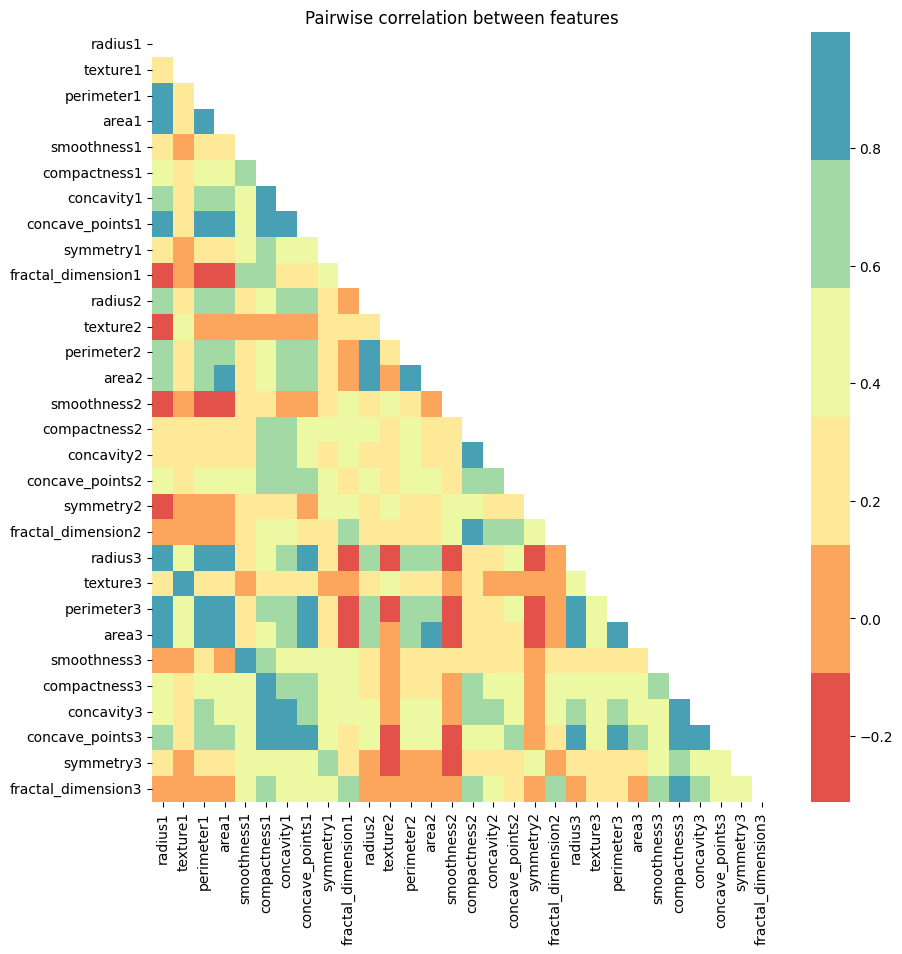

In [3]:
correlation = X.corr()

fig, ax = plt.subplots(1,1, figsize=(10,10))
sns.heatmap(correlation, annot=False, mask=np.triu(correlation),
            cmap=sns.color_palette("Spectral"))
ax.set_title("Pairwise correlation between features")
plt.show()

### Class Counts

In [4]:
print(collections.Counter(y['Diagnosis']))

Counter({'B': 357, 'M': 212})


### Class-wise features distributions

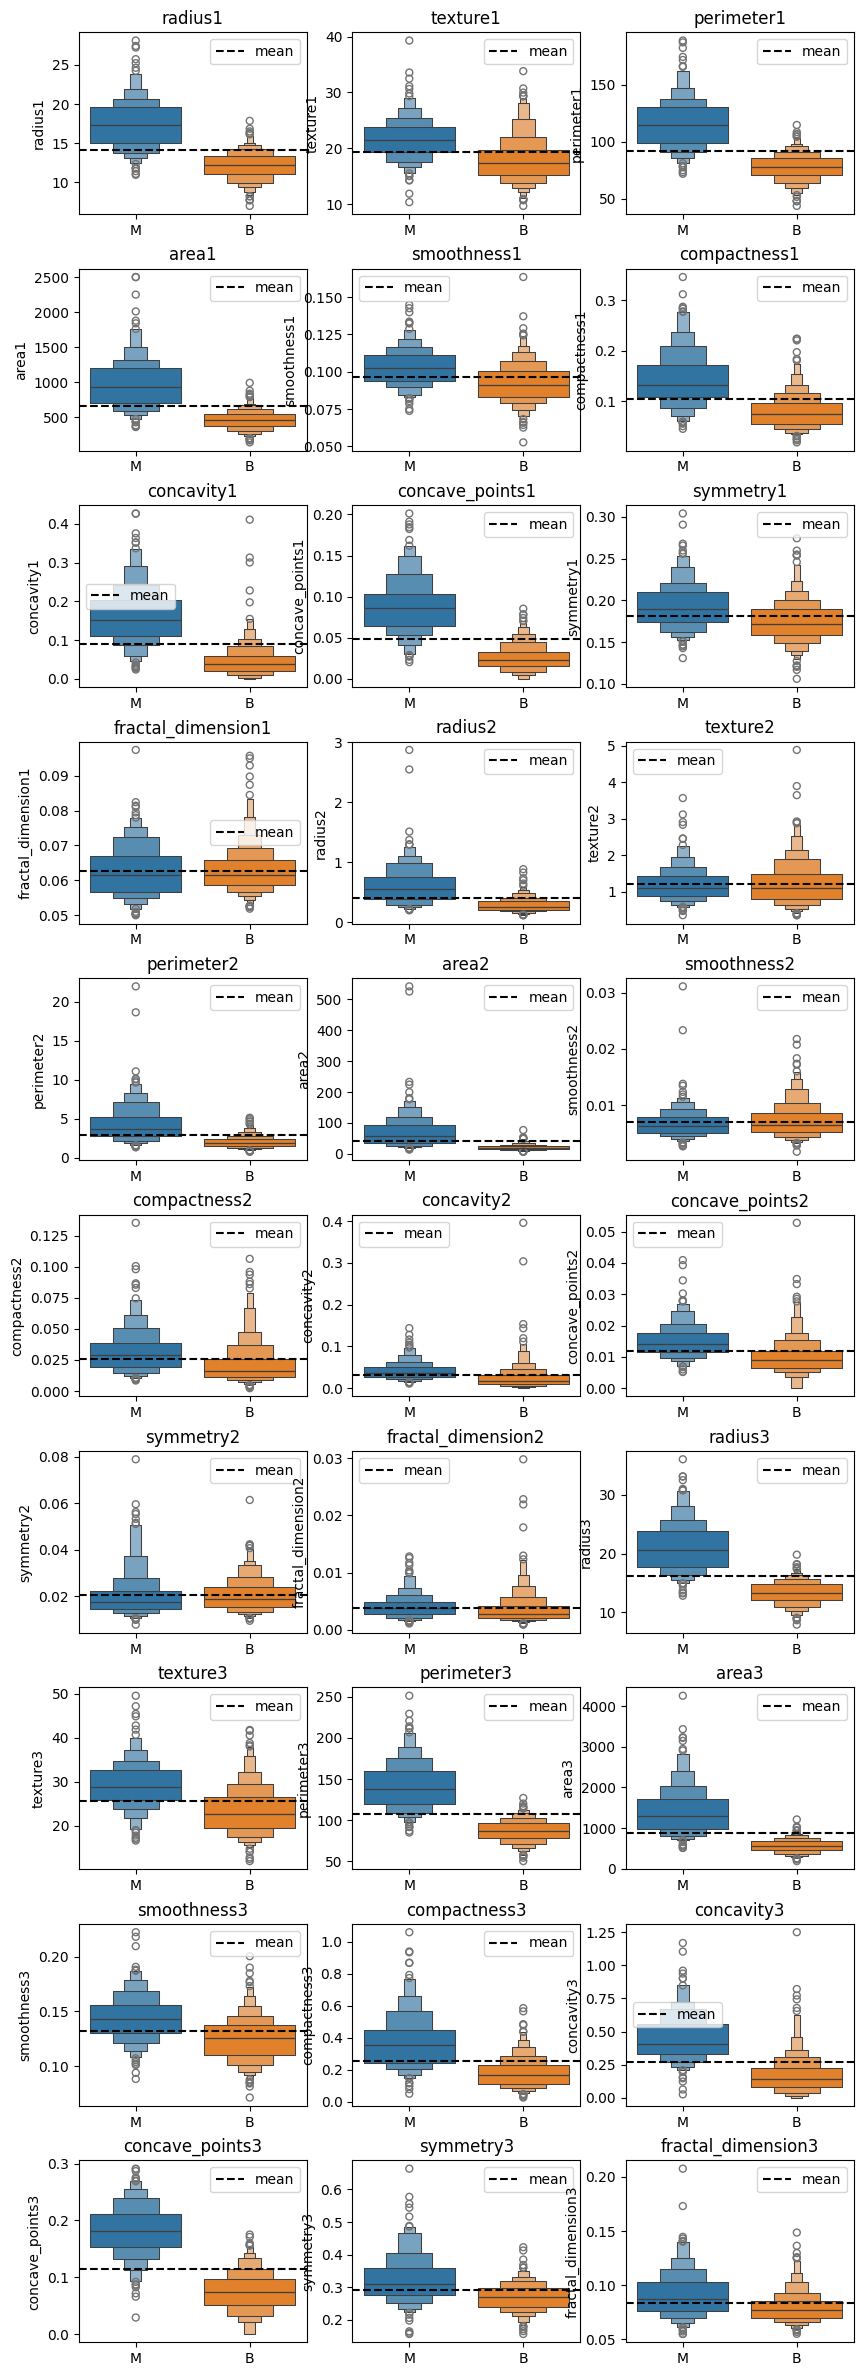

In [5]:
plt.figure(figsize=(10,30))

for i,j in itertools.zip_longest(list(X.columns), range(len(list(X.columns)))):
  plt.subplot(10,3,j+1)
  sns.boxenplot(x=y['Diagnosis'], y=X[i], hue=y['Diagnosis'])
  plt.title(i)
  plt.xlabel('')
  plt.subplots_adjust(hspace=.3)
  plt.axhline(X[i].mean(), linestyle="dashed", color='k', label='mean')
  plt.legend(loc='best')

# Phase 1 - Supervised Techniques

## Q1 - Implementing simple classifiers

[INSERT HERE: a brief description of how
you went about implementing the solution to the question]

In [7]:
## sklearn utilities for evaluation
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder

#Setting random seed for reproducibility
np.random.seed(42)

# Temporary imports for tasks 2 and 4
from sklearn.decomposition import TruncatedSVD
from imblearn.over_sampling import SMOTE

# Convert to numpy arrays for easier manipulation
X_data = X.values
y_data = y.values.ravel()

### encode labels to binary (0 and 1)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_data)

print(f"Dataset shape : {X_data.shape}")
print(f"Feature names: {X.columns.tolist()}")
print(f"Class distribution : {dict(zip(*np.unique(y_encoded, return_counts=True)))}")
print(f"Classes: {label_encoder.classes_}")

Dataset shape : (569, 30)
Feature names: ['radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1', 'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2', 'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3']
Class distribution : {np.int64(0): np.int64(357), np.int64(1): np.int64(212)}
Classes: ['B' 'M']


In [8]:
# [YOUR IMPLEMENTATION CODE HERE]
class DecisionTreeClassifier:

    def __init__(self, max_depth=10, min_samples_split=2):
        ## max depth to prevent overfitting
        self.max_depth = max_depth
        # minimum samples needed to split a node
        self.min_samples_split = min_samples_split
        self.tree = None

    def _entropy(self, y):

        # Calculate entropy of a label distribution.
        # H(S) = -sum(p_i * log2(p_i))

        ### get unique classes and their counts
        _, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)

        # >> compute entropy, avoiding log(0)
        entropy = -np.sum([p * np.log2(p) for p in probabilities if p > 0])
        return entropy

    def _information_gain(self, X_column, y, threshold):

        # Calculate information gain for a given feature and threshold.
        # IG = H(parent) - weighted_avg(H(children))

        # entropy before split
        parent_entropy = self._entropy(y)

        ## create binary split based on threshold
        left_mask = X_column <= threshold
        right_mask = ~left_mask

        # >> check if split actually divides the data
        if np.sum(left_mask) == 0 or np.sum(right_mask) == 0:
            return 0

        ### calculate weighted entropy of children
        n = len(y)
        n_left, n_right = np.sum(left_mask), np.sum(right_mask)
        entropy_left = self._entropy(y[left_mask])
        entropy_right = self._entropy(y[right_mask])

        # weighted average of child entropies
        weighted_entropy = (n_left / n) * entropy_left + (n_right / n) * entropy_right

        ## information gain is the reduction in entropy
        info_gain = parent_entropy - weighted_entropy
        return info_gain

    def _best_split(self, X, y):

        # Find the best feature and threshold to split on based on information gain.

        best_gain = -1
        best_feature = None
        best_threshold = None

        # >> iterate through each feature
        n_features = X.shape[1]
        for feature_idx in range(n_features):
            X_column = X[:, feature_idx]
            ## use unique values as potential thresholds
            thresholds = np.unique(X_column)

            ### try each threshold
            for threshold in thresholds:
                gain = self._information_gain(X_column, y, threshold)

                # update best split if this is better
                if gain > best_gain:
                    best_gain = gain
                    best_feature = feature_idx
                    best_threshold = threshold

        return best_feature, best_threshold, best_gain

    def _build_tree(self, X, y, depth=0):

        # Recursively build the decision tree.

        n_samples, n_features = X.shape
        n_classes = len(np.unique(y))

        ### stopping criteria: max depth, min samples, or pure node
        if (depth >= self.max_depth or
            n_samples < self.min_samples_split or
            n_classes == 1):
            # return leaf node with majority class
            leaf_value = np.argmax(np.bincount(y.astype(int)))
            return {'leaf': True, 'value': leaf_value}

        ## find best split
        best_feature, best_threshold, best_gain = self._best_split(X, y)

        # >> if no good split found, make leaf node
        if best_feature is None or best_gain == 0:
            leaf_value = np.argmax(np.bincount(y.astype(int)))
            return {'leaf': True, 'value': leaf_value}

        ### split the data
        left_mask = X[:, best_feature] <= best_threshold
        right_mask = ~left_mask

        # recursively build left and right subtrees
        left_tree = self._build_tree(X[left_mask], y[left_mask], depth + 1)
        right_tree = self._build_tree(X[right_mask], y[right_mask], depth + 1)

        ## return internal node
        return {
            'leaf': False,
            'feature': best_feature,
            'threshold': best_threshold,
            'left': left_tree,
            'right': right_tree
        }

    def fit(self, X, y):
        # Train the decision tree.
        self.tree = self._build_tree(X, y)
        return self

    def _predict_sample(self, x, tree):
        # Predict class for a single sample.
        # >> if leaf node, return the value
        if tree['leaf']:
            return tree['value']

        ### traverse tree based on feature threshold
        if x[tree['feature']] <= tree['threshold']:
            return self._predict_sample(x, tree['left'])
        else:
            return self._predict_sample(x, tree['right'])

    def predict(self, X):
        # predict each sample using the tree
        predictions = np.array([self._predict_sample(x, self.tree) for x in X])
        return predictions

In [9]:
class NaiveBayesClassifier:

    def __init__(self):
        self.classes = None
        self.class_priors = None
        ## mean and variance for each feature per class
        self.means = None
        self.variances = None

    def fit(self, X, y):
        # Train the Naive Bayes classifier.
        self.classes = np.unique(y)
        n_classes = len(self.classes)
        n_features = X.shape[1]

        ### initialize parameter arrays
        self.means = np.zeros((n_classes, n_features))
        self.variances = np.zeros((n_classes, n_features))
        self.class_priors = np.zeros(n_classes)

        # >> calculate statistics for each class
        for idx, c in enumerate(self.classes):
            X_c = X[y == c]
            ## compute mean and variance for each feature
            self.means[idx, :] = X_c.mean(axis=0)
            self.variances[idx, :] = X_c.var(axis=0) + 1e-9  # add small constant to avoid division by zero
            # class prior probability
            self.class_priors[idx] = X_c.shape[0] / X.shape[0]

        return self

    def _gaussian_probability(self, x, mean, var):
        # Calculate probability density function of Gaussian distribution.
        # p(x|mu,sigma^2) = (1/sqrt(2*pi*sigma^2)) * exp(-(x-mu)^2 / (2*sigma^2))

        ### compute gaussian pdf
        exponent = np.exp(-((x - mean) ** 2) / (2 * var))
        # normalization constant
        return (1 / np.sqrt(2 * np.pi * var)) * exponent

    def _predict_sample(self, x):
        # Predict class for a single sample using Bayes theorem."""
        posteriors = []

        ## calculate posterior for each class
        for idx, c in enumerate(self.classes):
            # >> start with log prior to avoid numerical underflow
            prior = np.log(self.class_priors[idx])

            ### calculate likelihood for each feature (assuming independence)
            probs = self._gaussian_probability(x, self.means[idx, :], self.variances[idx, :])
            likelihood = np.sum(np.log(np.maximum(probs, 1e-10)))

            # posterior = prior + likelihood (in log space)
            posterior = prior + likelihood
            posteriors.append(posterior)

        ## return class with highest posterior probability
        return self.classes[np.argmax(posteriors)]

    def predict(self, X):
        # Predict classes for all samples.
        # predict each sample
        predictions = np.array([self._predict_sample(x) for x in X])
        return predictions

In [10]:
def evaluate_classifier(classifier, X, y, n_folds=10):
    """
      Evaluate classifier using stratified k-fold cross-validation.
    Returns mean and std of F1 scores.
    """
    # stratified k-fold to maintain class distribution across folds
    skf = StratifiedKFold(n_splits = n_folds, shuffle = True, random_state = 42)
    f1_scores = []

    ## iterate through each fold
    for train_idx, test_idx in skf.split(X, y):
        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        # train the classifier and get predictions
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)

        # >> compute F1 score for this fold
        f1 = f1_score(y_test, y_pred, average='binary')
        f1_scores.append(f1)

    ### return mean and std across all folds
    return np.mean(f1_scores), np.std(f1_scores)

In [11]:
# >> evaluate both classifiers
dt_classifier = DecisionTreeClassifier(max_depth=10, min_samples_split=5)
nb_classifier = NaiveBayesClassifier()

print("Eval. Decision Tree Classifier")
dt_mean, dt_std = evaluate_classifier(dt_classifier, X_data, y_encoded)
print(f"Decision Tree - F1 Score: {dt_mean:.4f} ± {dt_std:.4f}")

print("\nEvaluating Naive Bayes Classifier")
nb_mean, nb_std = evaluate_classifier(nb_classifier, X_data, y_encoded)
print(f"Naive Bayes - F1 Score: {nb_mean:.4f} ± {nb_std:.4f}")

Eval. Decision Tree Classifier
Decision Tree - F1 Score: 0.9141 ± 0.0433

Evaluating Naive Bayes Classifier
Naive Bayes - F1 Score: 0.9061 ± 0.0436


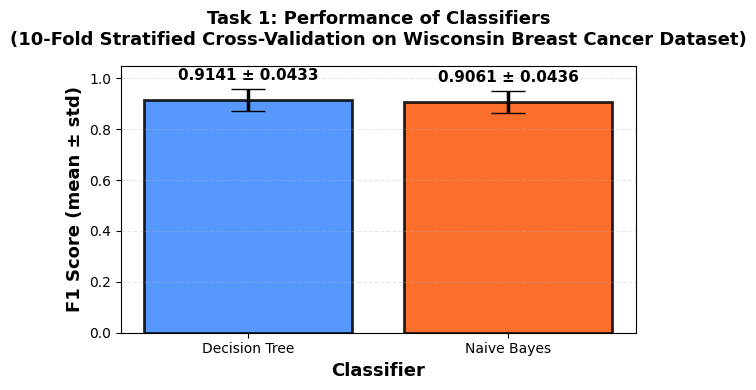

In [14]:
# [YOUR PLOTTING CODE HERE]

### Plot results as bar chart with error bars showing std dev
classifiers = ['Decision Tree', 'Naive Bayes']
means = [dt_mean, nb_mean]
stds = [dt_std, nb_std]

fig, ax = plt.subplots(figsize=(6, 4))

## created bars
bars = ax.bar(classifiers, means, yerr=stds, capsize=12,
               color=['#3A86FF', '#FB5607'], alpha=0.85,
               edgecolor='black', linewidth=2, error_kw={'linewidth': 2.5, 'ecolor': 'black'})

### format the plot
ax.set_ylabel('F1 Score (mean ± std)', fontsize=13, fontweight='bold')
ax.set_xlabel('Classifier', fontsize=13, fontweight='bold')
ax.set_title('Task 1: Performance of Classifiers\n' +
             '(10-Fold Stratified Cross-Validation on Wisconsin Breast Cancer Dataset)',
             fontsize=13, fontweight='bold', pad=15)
ax.set_ylim([0, 1.05])
ax.grid(axis='y', alpha=0.3, linestyle='--', linewidth=0.8)

# >> add value labels on top of bars showing mean±std
for bar, mean, std in zip(bars, means, stds):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + std + 0.025,
            f'{mean:.4f} ± {std:.4f}',
            ha='center', va='bottom', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()


## Q2 - Dimensionality reduction with the Singular Value Decomposition

[INSERT HERE: a brief description of how
you went about implementing the solution to the question]

In [18]:
# [YOUR IMPLEMENTATION CODE HERE]
from sklearn.model_selection import train_test_split

def singularValueDecomposition(X, k=10):

    X_mean = X.mean(axis=0)
    X_center = X - X_mean 

    U, S, V = np.linalg.svd(X_center)

    U_k = U[:, :k]
    S_k = np.diag(S[:k])
    V_k = V[:k, :]

    X_red = U_k @ S_k 

    return X_red, X_mean, X_center, V_k


X_np = X.to_numpy()
y_np = y["Diagnosis"].to_numpy()
y_encoded = label_encoder.fit_transform(y_np)

X_train, X_test, y_train, y_test = train_test_split(X_np, y_encoded, test_size=0.2, random_state=42)

X_train_red, X_train_mean, X_train_center, V_k = singularValueDecomposition(X_train)

print("Original number of features: ",  X_train.shape[1])
print("Number of features after SVD: ", X_train_red.shape[1])


Original number of features:  30
Number of features after SVD:  10


In [19]:
# Augmenting test data based on our svd calculations on train

X_test_cent = X_test - X_train_mean
X_test_red = X_test_cent @ V_k.T 

print(X_test.shape)
print(X_test_red.shape)

(114, 30)
(114, 10)


K=5
Train accuracy (Decision Tree): 0.9911504424778761
Test accuracy (Decision Tree): 0.8941176470588236
Test accuracy (Naive Bayes): 0.8643533123028391
Test accuracy (Naive Bayes): 0.9135802469135802
K=10
Train accuracy (Decision Tree): 0.9970501474926253
Test accuracy (Decision Tree): 0.9090909090909091
Test accuracy (Naive Bayes): 0.8544891640866873
Test accuracy (Naive Bayes): 0.9047619047619048
K=15
Train accuracy (Decision Tree): 1.0
Test accuracy (Decision Tree): 0.9176470588235294
Test accuracy (Naive Bayes): 0.8580060422960725
Test accuracy (Naive Bayes): 0.8809523809523809
K=20
Train accuracy (Decision Tree): 1.0
Test accuracy (Decision Tree): 0.896551724137931
Test accuracy (Naive Bayes): 0.851963746223565
Test accuracy (Naive Bayes): 0.8433734939759037
K=25
Train accuracy (Decision Tree): 1.0
Test accuracy (Decision Tree): 0.9176470588235294
Test accuracy (Naive Bayes): 0.8433734939759037
Test accuracy (Naive Bayes): 0.8604651162790697
K=30
Train accuracy (Decision Tree): 1

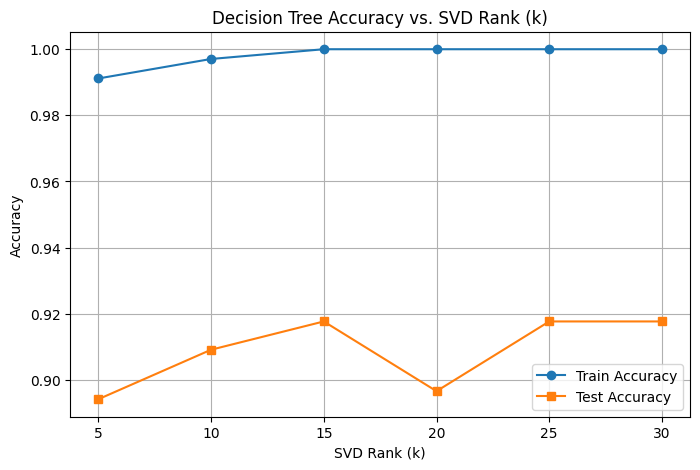

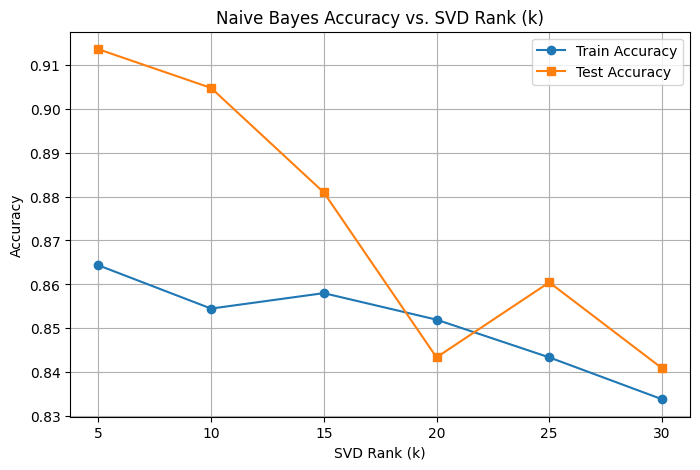

In [21]:
# [YOUR PLOTTING CODE HERE]

k_list = [5,10,15,20,25,30]

train_results_dt = []
test_results_dt = []

train_results_nb = []
test_results_nb = []

for k in k_list:
    X_train_red, X_train_mean, X_train_center, V_k = singularValueDecomposition(X_train, k=k)
    X_test_cent = X_test - X_train_mean
    X_test_red = X_test_cent @ V_k.T 

    # Generating results for Decision Tree classifier
    dt_classifier = DecisionTreeClassifier(max_depth=10, min_samples_split=5)

    dt_classifier.fit(X_train_red, y_train)

    y_train_pred_dt = dt_classifier.predict(X_train_red)
    y_test_pred_dt = dt_classifier.predict(X_test_red)

    f1_train_dt = f1_score(y_train, y_train_pred_dt, average='binary')
    train_results_dt.append(f1_train_dt)

    f1_test_dt = f1_score(y_test, y_test_pred_dt, average='binary')
    test_results_dt.append(f1_test_dt)

    # Generating results for Decision Tree classifier
    nb_classifier = NaiveBayesClassifier()
    nb_classifier.fit(X_train_red, y_train)

    y_train_pred_nb = nb_classifier.predict(X_train_red)
    y_test_pred_nb = nb_classifier.predict(X_test_red)

    f1_train_nb = f1_score(y_train, y_train_pred_nb, average='binary')
    train_results_nb.append(f1_train_nb)

    f1_test_nb = f1_score(y_test, y_test_pred_nb, average='binary')
    test_results_nb.append(f1_test_nb)


    print(f"K={k}")
    print(f"Train accuracy (Decision Tree): {f1_train_dt}")
    print(f"Test accuracy (Decision Tree): {f1_test_dt}")

    print(f"Test accuracy (Naive Bayes): {f1_train_nb}")
    print(f"Test accuracy (Naive Bayes): {f1_test_nb}")

plt.figure(figsize=(8, 5))
plt.plot(k_list, train_results_dt, marker='o', label='Train Accuracy')
plt.plot(k_list, test_results_dt, marker='s', label='Test Accuracy')
plt.title('Decision Tree Accuracy vs. SVD Rank (k)')
plt.xlabel('SVD Rank (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(k_list, train_results_nb, marker='o', label='Train Accuracy')
plt.plot(k_list, test_results_nb, marker='s', label='Test Accuracy')
plt.title('Naive Bayes Accuracy vs. SVD Rank (k)')
plt.xlabel('SVD Rank (k)')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
    


## Q3 - Feature selection with randomization

[INSERT HERE: a brief description of how
you went about implementing the solution to the question]

In [22]:
# [YOUR IMPLEMENTATION CODE HERE]
def feature_importance_randomization(classifier_class, X, y, feature_names,
                                     test_size=0.8, n_folds=5, random_state=42):

    # Calculate feature importance using randomization (permutation) method.


    ### split data into feature selection sample (20%) and holdout (80%)
    X_fs, X_holdout, y_fs, y_holdout = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )

    print(f"Feature selection sample size : {X_fs.shape[0]}")
    print(f"Holdout set size: {X_holdout.shape[0]}\n")

    # >> get baseline performance with original features
    skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=random_state)
    baseline_scores = []

    ### evaluate baseline model
    for train_idx, val_idx in skf.split(X_fs, y_fs):
        X_train, X_val = X_fs[train_idx], X_fs[val_idx]
        y_train, y_val = y_fs[train_idx], y_fs[val_idx]

        # train classifier on original data
        clf = classifier_class()
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_val)

        ## calculate F1 score
        f1 = f1_score(y_val, y_pred, average='binary')
        baseline_scores.append(f1)

    baseline_mean = np.mean(baseline_scores)
    print(f"Baseline F1 Score : {baseline_mean:.4f}\n")

    # calculate importance for each feature
    feature_importances = []

    ## iterate through each feature
    for feature_idx in range(X_fs.shape[1]):
        print(f"Processing feature {feature_idx + 1}/{X_fs.shape[1]}: {feature_names[feature_idx]}")

        randomized_scores = []

        ### evaluate with randomized feature
        for train_idx, val_idx in skf.split(X_fs, y_fs):
            X_train, X_val = X_fs[train_idx].copy(), X_fs[val_idx].copy()
            y_train, y_val = y_fs[train_idx], y_fs[val_idx]

            # >> randomize (permute) the feature in training data
            X_train_rand = X_train.copy()
            X_train_rand[:, feature_idx] = np.random.permutation(X_train[:, feature_idx])

            ## randomize the feature in validation data
            X_val_rand = X_val.copy()
            X_val_rand[:, feature_idx] = np.random.permutation(X_val[:, feature_idx])

            # train on randomized data
            clf = classifier_class()
            clf.fit(X_train_rand, y_train)
            y_pred = clf.predict(X_val_rand)

            ### calculate F1 with randomized feature
            f1 = f1_score(y_val, y_pred, average='binary')
            randomized_scores.append(f1)

        # >> calculate mean performance with randomized feature
        randomized_mean = np.mean(randomized_scores)

        ## importance is the drop in performance (as percentage)
        if baseline_mean > 0:
            importance = ((baseline_mean - randomized_mean) / baseline_mean) * 100
        else:
            importance = 0

        ### store feature importance
        feature_importances.append({
            'feature': feature_names[feature_idx],
            'feature_idx': feature_idx,
            'importance': importance,
            'baseline_f1': baseline_mean,
            'randomized_f1': randomized_mean
        })

        print(f"  Importance: {importance:.2f}% (F1: {baseline_mean:.4f} -> {randomized_mean:.4f})\n")

    # >> sort features by importance (descending)
    feature_importances.sort(key=lambda x: x['importance'], reverse=True)

    return feature_importances, X_holdout, y_holdout

In [23]:
### get feature names
feature_names = X.columns.tolist()

print("=" * 80)
print("DECISION TREE - Feature Importance Analysis")
print("=" * 80)

## calculate feature importances using Decision Tree
dt_importances, X_holdout, y_holdout = feature_importance_randomization(
    lambda: DecisionTreeClassifier(max_depth=10, min_samples_split=5),
    X_data, y_encoded, feature_names,
    test_size=0.8, n_folds=5, random_state=42
)

# >> display top features
print("\n" + "=" *80)
print("TOP 10 MOST IMPORTANT FEATURES (Decision Tree):")
print("="* 80)
for i, feat in enumerate(dt_importances[:10], 1):
    print(f"{i:2d}. {feat['feature']:30s} - Importance: {feat['importance']:6.2f}%")

DECISION TREE - Feature Importance Analysis
Feature selection sample size : 113
Holdout set size: 456

Baseline F1 Score : 0.8540

Processing feature 1/30: radius1
  Importance: 0.52% (F1: 0.8540 -> 0.8495)

Processing feature 2/30: texture1
  Importance: 0.00% (F1: 0.8540 -> 0.8540)

Processing feature 3/30: perimeter1
  Importance: 0.00% (F1: 0.8540 -> 0.8540)

Processing feature 4/30: area1
  Importance: 0.52% (F1: 0.8540 -> 0.8495)

Processing feature 5/30: smoothness1
  Importance: -1.80% (F1: 0.8540 -> 0.8693)

Processing feature 6/30: compactness1
  Importance: 0.00% (F1: 0.8540 -> 0.8540)

Processing feature 7/30: concavity1
  Importance: 0.00% (F1: 0.8540 -> 0.8540)

Processing feature 8/30: concave_points1
  Importance: 1.37% (F1: 0.8540 -> 0.8423)

Processing feature 9/30: symmetry1
  Importance: 0.00% (F1: 0.8540 -> 0.8540)

Processing feature 10/30: fractal_dimension1
  Importance: 0.00% (F1: 0.8540 -> 0.8540)

Processing feature 11/30: radius2
  Importance: -1.29% (F1: 0.

In [24]:
print("\n" + "+" * 80)
print("NAIVE BAYES - Feature Importance Analysis")
print("=" * 80)

### calculate feature importances using Naive Bayes
nb_importances, _, _ = feature_importance_randomization(
    NaiveBayesClassifier,
    X_data, y_encoded, feature_names,
    test_size=0.8, n_folds=5, random_state=42
)

# display top features
print("\n" + "-"*80)
print("TOP 10 MOST IMPORTANT FEATURES (Naive Bayes):")
print("=" * 80)
for i, feat in enumerate(nb_importances[:10], 1):
    print(f"{i:2d}. {feat['feature']:30s} - Importance: {feat['importance']:6.2f}%")


++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
NAIVE BAYES - Feature Importance Analysis
Feature selection sample size : 113
Holdout set size: 456

Baseline F1 Score : 0.8895

Processing feature 1/30: radius1
  Importance: 0.16% (F1: 0.8895 -> 0.8881)

Processing feature 2/30: texture1
  Importance: 1.12% (F1: 0.8895 -> 0.8795)

Processing feature 3/30: perimeter1
  Importance: 0.16% (F1: 0.8895 -> 0.8881)

Processing feature 4/30: area1
  Importance: 0.16% (F1: 0.8895 -> 0.8881)

Processing feature 5/30: smoothness1
  Importance: -0.53% (F1: 0.8895 -> 0.8942)

Processing feature 6/30: compactness1
  Importance: -2.65% (F1: 0.8895 -> 0.9131)

Processing feature 7/30: concavity1
  Importance: -0.71% (F1: 0.8895 -> 0.8959)

Processing feature 8/30: concave_points1
  Importance: 0.41% (F1: 0.8895 -> 0.8859)

Processing feature 9/30: symmetry1
  Importance: 0.16% (F1: 0.8895 -> 0.8881)

Processing feature 10/30: fractal_dimension1
  Importance: -0.96% (F1

Figure 1: Decision Tree Feature Importance


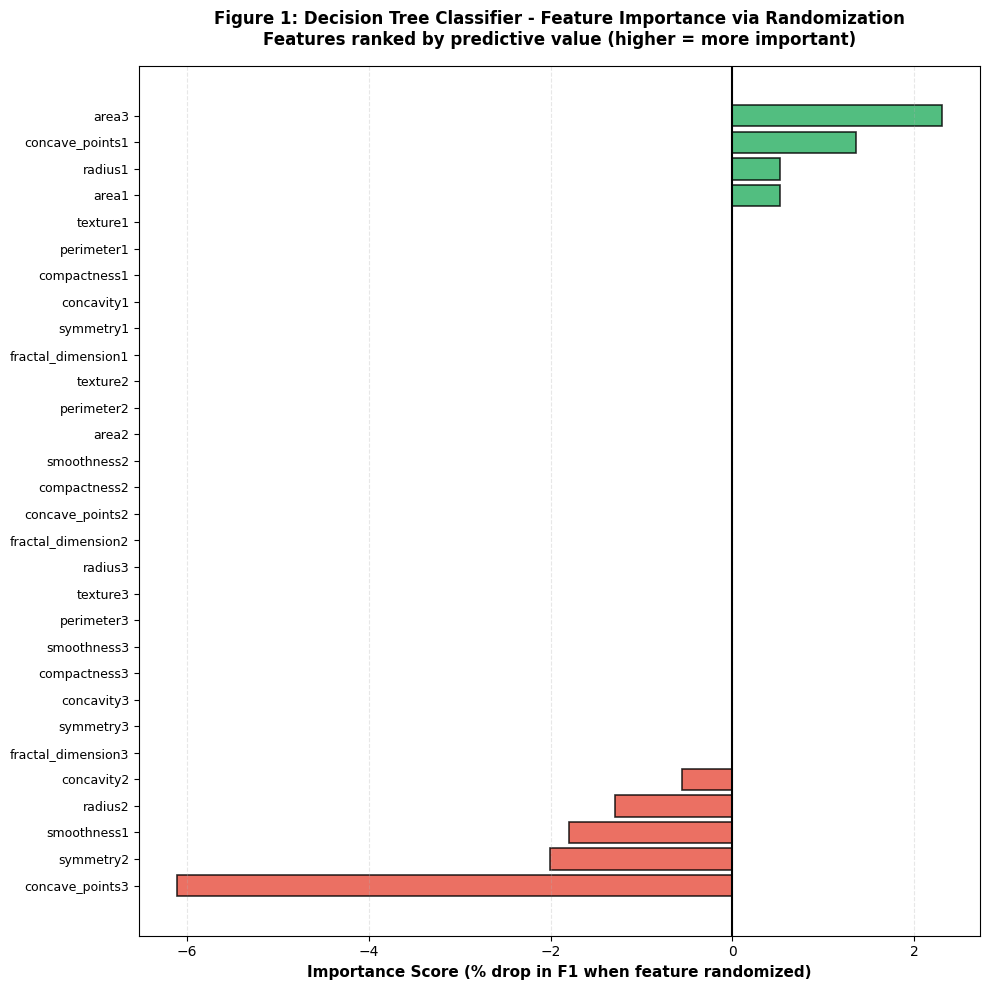

In [25]:
# [YOUR PLOTTING CODE HERE]
# FIGURE 1: Decision Tree Feature Importance
print("Figure 1: Decision Tree Feature Importance")
print("=" * 60)

dt_features = [f['feature'] for f in dt_importances]
dt_scores = [f['importance'] for f in dt_importances]

## color code: green for positive importance, red for negative
colors_dt = ['#27ae60' if score > 0 else '#e74c3c' for score in dt_scores]

### create the first figure
plt.figure(figsize=(10, 10))
plt.barh(range(len(dt_features)), dt_scores, color=colors_dt, alpha=0.8, edgecolor='black', linewidth=1.2)
plt.yticks(range(len(dt_features)), dt_features, fontsize=9)
plt.xlabel('Importance Score (% drop in F1 when feature randomized)', fontsize=11, fontweight='bold')
plt.title('Figure 1: Decision Tree Classifier - Feature Importance via Randomization\n' +
          'Features ranked by predictive value (higher = more important)',
          fontsize=12, fontweight='bold', pad=15)
plt.grid(axis='x', alpha=0.3, linestyle='--')
# >> add vertical line at zero for reference
plt.axvline(x=0, color='black', linewidth=1.5)
plt.gca().invert_yaxis()  # most important at top
plt.tight_layout()
plt.show()

print("\n")

Figure 2: Naive Bayes Feature Importance
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


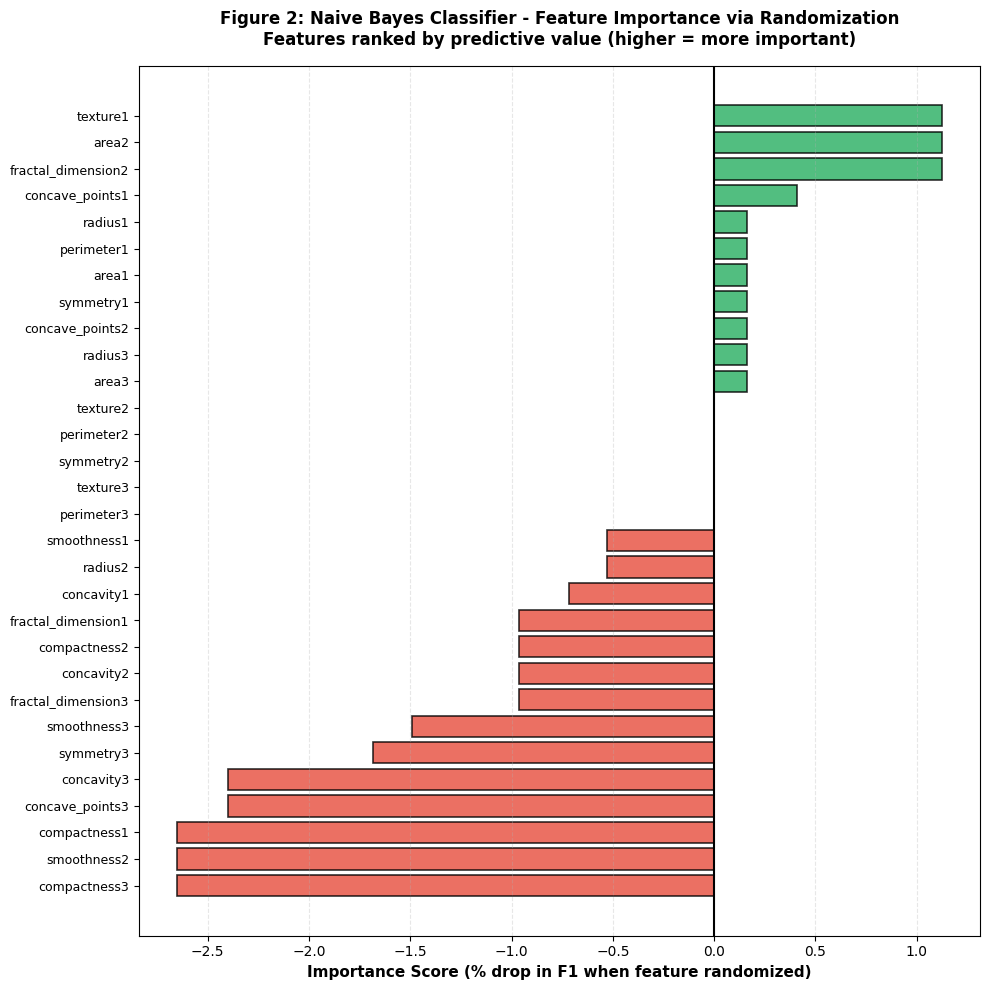

In [26]:
# FIGURE 2: Naive Bayes Feature Importance
print("Figure 2: Naive Bayes Feature Importance")
print("+" * 60)

nb_features = [f['feature'] for f in nb_importances]
nb_scores = [f['importance'] for f in nb_importances]

## color code: green for positive, red for negative importance
colors_nb = ['#27ae60' if score > 0 else '#e74c3c' for score in nb_scores]

# create the second figure
plt.figure(figsize=(10, 10))
plt.barh(range(len(nb_features)), nb_scores, color=colors_nb, alpha=0.8, edgecolor='black', linewidth=1.2)
plt.yticks(range(len(nb_features)), nb_features, fontsize=9)
plt.xlabel('Importance Score (% drop in F1 when feature randomized)', fontsize=11, fontweight='bold')
plt.title('Figure 2: Naive Bayes Classifier - Feature Importance via Randomization\n' +
          'Features ranked by predictive value (higher = more important)',
          fontsize=12, fontweight='bold', pad=15)
plt.grid(axis='x', alpha=0.3, linestyle='--')
### add vertical reference line at zero
plt.axvline(x=0, color='black', linewidth=1.5)
plt.gca().invert_yaxis()  # most important features at top
plt.tight_layout()
plt.show()

## Q4 - Data augmentation using SMOTE

In [27]:
y.Diagnosis.value_counts()

Diagnosis
B    357
M    212
Name: count, dtype: int64

In [ ]:
# [YOUR IMPLEMENTATION CODE HERE]
from sklearn.neighbors import NearestNeighbors

def smote(X, y, oversample_percent=100, k=5):
    """
    Perform SMOTE on the minority class.
    oversample_percent: how much to oversample (100 = double minority samples)
    k: number of nearest neighbors
    """
    X_minor = X[y == "M"] # Change this to label encodings in 0 and 1
    num_minor = len(X_minor)
    n_new = (oversample_percent // 100) * num_minor

    # Find k nearest neighbors among minority samples
    neighbors = NearestNeighbors(n_neighbors=k + 1).fit(X_minor)
    dist, indices = neighbors.kneighbors(X_minor)

    synthetic_samples = []
    rng = np.random.default_rng(20)

    for _ in range(n_new):
        i = rng.integers(0, num_minor)
        nn_index = rng.integers(1, k + 1)
        neighbor = X_minor[indices[i][nn_index]]

        diff = neighbor - X_minor[i]
        gap = rng.random()
        synthetic_sample = X_minor[i] + gap * diff
        synthetic_samples.append(synthetic_sample)

    X_syn = np.array(synthetic_samples)
    #y_syn = np.ones(len(X_syn), dtype=int) 
    y_syn = np.array(['M']*len(X_syn))

    X_aug = np.vstack((X, X_syn))
    y_aug = np.concatenate((y, y_syn))

    return X_aug, y_aug

X_aug, y_aug = smote(X_np, y_encoded)
print(X_np.shape, y_encoded.shape)
print(X_aug.shape, y_aug.shape)

print(X_np.shape)

ValueError: Found array with 0 sample(s) (shape=(0, 30)) while a minimum of 1 is required by NearestNeighbors.

In [ ]:
# [YOUR PLOTTING CODE HERE]